# PCA

Analisis de componentes principales 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Extraccion de datos

#hf_0050 
x0050 = np.load('C:/Users/marit/Documents/UPY Estancia I/Full Fixed Ones/hf_0050_full_fix.npy')

#hf_0250
x0250 = np.load('C:/Users/marit/Documents/UPY Estancia I/Full Fixed Ones/hf_0250_full_fix.npy')

#hf_0100
x0100 = np.load('C:/Users/marit/Documents/UPY Estancia I/Full Fixed Ones/hf_0100_full_fix.npy')

#hf_macro
xmacro = np.load('C:/Users/marit/Documents/UPY Estancia I/Full Fixed Ones/hf_macro_full_fix.npy')

In [3]:
pca0050 = PCA()
pca0250 = PCA()
pca0100 = PCA()
pcamacro = PCA()

pca0050.fit(x0050)
pca0250.fit(x0250)
pca0100.fit(x0100)
pcamacro.fit(xmacro)

xtrans0050 = pca0050.transform(x0050)
xtrans0250 = pca0250.transform(x0250)
xtrans0100 = pca0100.transform(x0100)
xtransmacro = pcamacro.transform(xmacro)

var0050 = pca0050.explained_variance_ratio_
var0250 = pca0250.explained_variance_ratio_
var0100 = pca0100.explained_variance_ratio_
varmacro = pcamacro.explained_variance_ratio_

cum0050 = np.cumsum(var0050)
cum0250 = np.cumsum(var0250)
cum0100 = np.cumsum(var0100)
cummacro = np.cumsum(varmacro)

In [4]:
# !!!
x0050[0].shape

(480,)

In [5]:
# !!!
xtrans0050[:,cum0050 <= 0.8].shape

(221113, 246)

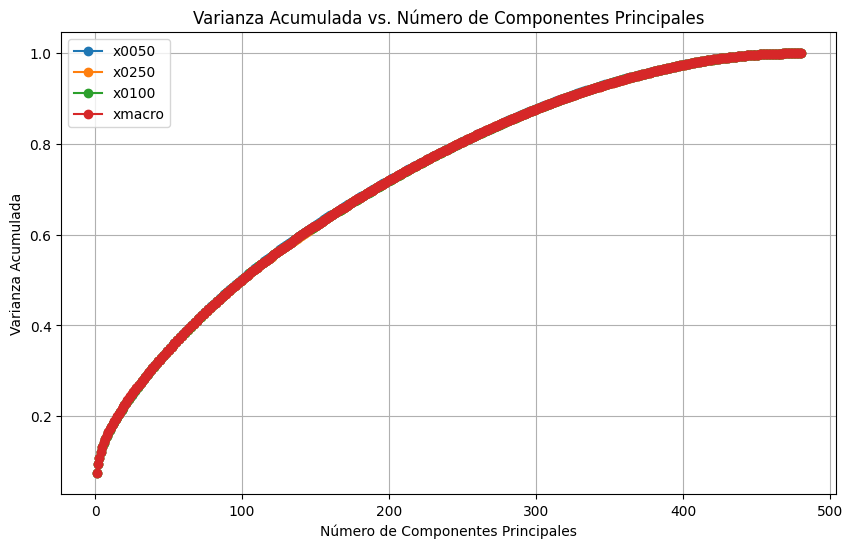

In [6]:
# Graficar la varianza acumulada contra el número de componentes principales
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum0050) + 1), cum0050, marker='o', linestyle='-', label='x0050')
plt.plot(range(1, len(cum0250) + 1), cum0250, marker='o', linestyle='-', label='x0250')
plt.plot(range(1, len(cum0100) + 1), cum0100, marker='o', linestyle='-', label='x0100')
plt.plot(range(1, len(cummacro) + 1), cummacro, marker='o', linestyle='-', label='xmacro')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada vs. Número de Componentes Principales')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#componentes mayores al 80% de la varianza
var0050_80 = xtrans0050[:,cum0050 <= 0.8]
var0250_80 = xtrans0250[:,cum0250 <= 0.8]
var0100_80 = xtrans0100[:,cum0100 <= 0.8]
varmacro_80 = xtransmacro[:,cummacro <= 0.8]

#componentes mayores al 95% de la varianza
var0050_95 = xtrans0050[:,cum0050 <= 0.95]
var0250_95 = xtrans0250[:,cum0250 <= 0.95]
var0100_95 = xtrans0100[:,cum0100 <= 0.95]
varmacro_95 = xtransmacro[:,cummacro <= 0.95]

In [8]:
varianzas_80 = [var0050_80, var0250_80, var0100_80, varmacro_80]

In [9]:
varianzas_95 = [var0050_95, var0250_95, var0100_95, varmacro_95]

In [10]:
for i in range(4):
    print(varianzas_80[i].shape)
    print(varianzas_95[i].shape)

(221113, 246)
(221113, 367)
(221113, 246)
(221113, 368)
(221112, 246)
(221112, 368)
(221113, 246)
(221113, 367)


In [11]:
# Ahora guardaremos los nuevos archivos con la reduccion de PCA con solo las componentes necesarias para recuperar la varianza de 80% y 95%.
# Esto nos dara en total 8 archivos.

'''Variances with 80'''
np.save('hf_0050_var_80', var0050_80)
np.save('hf_0250_var_80', var0250_80)
np.save('hf_0100_var_80', var0100_80)
np.save('hf_macro_var_80', varmacro_80)

'''Variances with 95'''
np.save('hf_0050_var_95', var0050_95)
np.save('hf_0250_var_95', var0250_95)
np.save('hf_0100_var_95', var0100_95)
np.save('hf_macro_var_95', varmacro_95)